<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/GRU_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 6

## GRU Models

### Tensorflow

Import

In [8]:
import pandas as pd
import re
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Preprocessing fungsi & Preprocessing fungsi

In [9]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/06.%20Week%206/Datasets/DeteksiSarkasme.json"
df = pd.read_json(url, lines=True)

# Ambil fitur dan label
sentences = df['headline'].values
labels = df['is_sarcastic'].values

# Preprocessing fungsi
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

sentences = [clean_text(s) for s in sentences]

Tokenisasi dan padding

In [10]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post', maxlen=40)


Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (21367, 40), Test shape: (5342, 40)


Model GRU (TensorFlow)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Parameter
vocab_size = len(word_index) + 1
embedding_dim = 64
max_length = 40

# Model GRU
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training

In [15]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[early_stop])

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.5583 - loss: 0.6865 - val_accuracy: 0.5538 - val_loss: 0.6874
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.5605 - loss: 0.6860 - val_accuracy: 0.5538 - val_loss: 0.6880
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.5599 - loss: 0.6865 - val_accuracy: 0.5538 - val_loss: 0.6876
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.5637 - loss: 0.6852 - val_accuracy: 0.5538 - val_loss: 0.6874
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.5593 - loss: 0.6862 - val_accuracy: 0.5538 - val_loss: 0.6876
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.5610 - loss: 0.6859 - val_accuracy: 0.5538 - val_loss: 0.6875
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.5607 - loss: 0.6860 - val_accuracy: 0.5538 - val_loss: 0.6876


Evaluasi

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Prediksi
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred_classes))

# ROC AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5588 - loss: 0.6863

Test Accuracy: 0.5608
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2996
           1       0.00      0.00      0.00      2346

    accuracy                           0.56      5342
   macro avg       0.28      0.50      0.36      5342
weighted avg       0.31      0.56      0.40      5342

AUC Score: 0.4923


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 ROC Curve

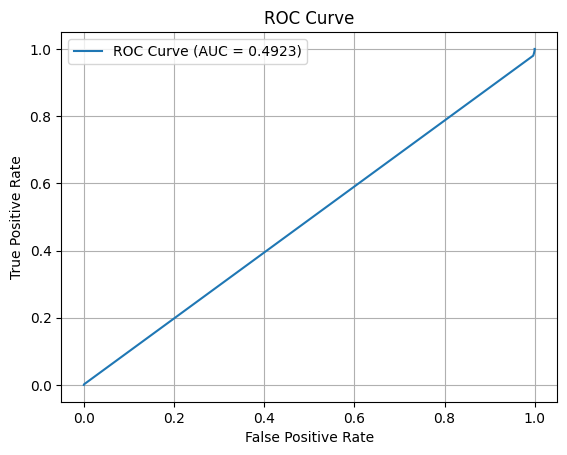

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.grid()
plt.show()

Plot Akurasi dan Loss

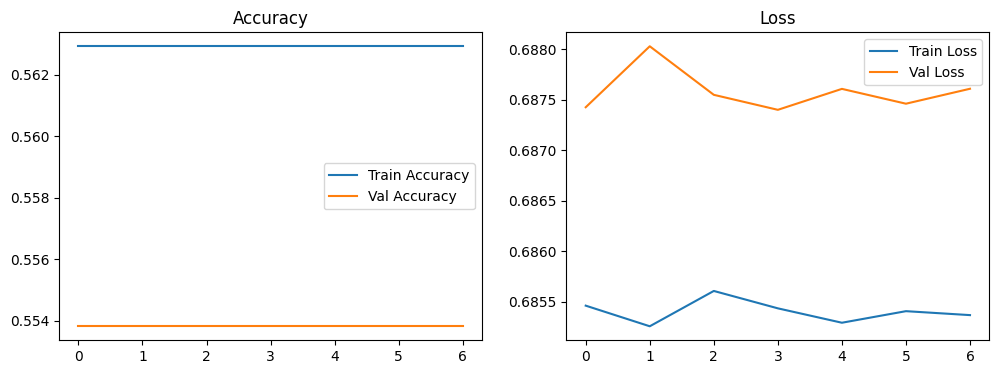

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

Hyperparameter Tuning

In [24]:
pip install keras-tuner

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)


In [25]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=hp.Choice('embedding_dim', [32, 64, 128]),
        input_length=max_length
    ))

    model.add(GRU(
        units=hp.Int('gru_units', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))

    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))

    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

Inisialisasi tuner

In [26]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner_dir',
    project_name='gru_sarcasm'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


hyperparameter terbaik

In [29]:
tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stop])

Trial 10 Complete [00h 01m 47s]
val_accuracy: 0.5538137555122375

Best val_accuracy So Far: 0.8228825330734253
Total elapsed time: 00h 37m 20s


model terbaik

In [30]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best Hyperparameters:
- Embedding dim: {best_hps.get('embedding_dim')}
- GRU units: {best_hps.get('gru_units')}
- Dense units: {best_hps.get('dense_units')}
- Dropout rate: {best_hps.get('dropout_rate')}
- Learning rate: {best_hps.get('learning_rate')}
""")


Best Hyperparameters:
- Embedding dim: 128
- GRU units: 96
- Dense units: 48
- Dropout rate: 0.2
- Learning rate: 0.01



/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Evaluasi Akhir Model Terbaik

In [31]:
# Train ulang model terbaik
history_best = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64, callbacks=[early_stop])

# Evaluasi
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"\nBest Model Test Accuracy: {accuracy:.4f}")

# Prediksi dan metrik lainnya
y_pred_best = best_model.predict(X_test)
y_pred_classes_best = (y_pred_best > 0.5).astype("int32")

print(classification_report(y_test, y_pred_classes_best))
print(f"AUC Score: {roc_auc_score(y_test, y_pred_best):.4f}")


Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 36s 120ms/step - accuracy: 0.9038 - loss: 0.2439 - val_accuracy: 0.8255 - val_loss: 0.4281
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.9294 - loss: 0.1844 - val_accuracy: 0.8212 - val_loss: 0.4721
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9461 - loss: 0.1422 - val_accuracy: 0.8147 - val_loss: 0.4882
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9571 - loss: 0.1149 - val_accuracy: 0.8140 - val_loss: 0.5260
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8235 - loss: 0.4870

Best Model Test Accuracy: 0.8265
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2996
           1       0.80      0.80      0.80      2346

    accuracy                           0.83      5342
   macro avg       0.82      0.82      0.82      5342
weighted avg       0.83      0.83      0.83      534

### Pytorch

Setup Awal PyTorch

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Pastikan pakai GPU kalau tersedia
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


Konversi data ke tensor

In [33]:
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


Dataset dan DataLoader

In [34]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Model GRU di PyTorch

In [35]:
class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout):
        super(GRUClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, 32)
        self.fc2 = nn.Linear(32, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        _, hidden = self.gru(embedded)
        x = self.dropout(hidden.squeeze(0))
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc2(x))
        return x

# Parameter
embedding_dim = 64
hidden_dim = 64
output_dim = 1
dropout = 0.5

model = GRUClassifier(vocab_size, embedding_dim, hidden_dim, output_dim, dropout).to(device)
print(model)


GRUClassifier(
  (embedding): Embedding(28401, 64)
  (gru): GRU(64, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


Training Model & Validation

In [36]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss/len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_losses.append(val_loss/len(test_loader))

    print(f"Epoch {epoch+1}/{n_epochs} => Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")


Epoch 1/10 => Train Loss: 0.6879, Val Loss: 0.6832
Epoch 2/10 => Train Loss: 0.5377, Val Loss: 0.4453
Epoch 3/10 => Train Loss: 0.3794, Val Loss: 0.4021
Epoch 4/10 => Train Loss: 0.2834, Val Loss: 0.4160
Epoch 5/10 => Train Loss: 0.2079, Val Loss: 0.4251
Epoch 6/10 => Train Loss: 0.1439, Val Loss: 0.5313
Epoch 7/10 => Train Loss: 0.0977, Val Loss: 0.5791
Epoch 8/10 => Train Loss: 0.0665, Val Loss: 0.6795
Epoch 9/10 => Train Loss: 0.0463, Val Loss: 0.7956
Epoch 10/10 => Train Loss: 0.0370, Val Loss: 0.7893


Evaluasi Model

In [37]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        all_preds.extend(outputs.cpu().numpy())
        all_labels.extend(labels.numpy())

all_preds_binary = np.array(all_preds) > 0.5

# Classification report
print(classification_report(all_labels, all_preds_binary))
print(f"AUC Score: {roc_auc_score(all_labels, all_preds):.4f}")

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      2996
         1.0       0.82      0.78      0.80      2346

    accuracy                           0.83      5342
   macro avg       0.83      0.82      0.82      5342
weighted avg       0.83      0.83      0.83      5342

AUC Score: 0.9058


ROC Curve

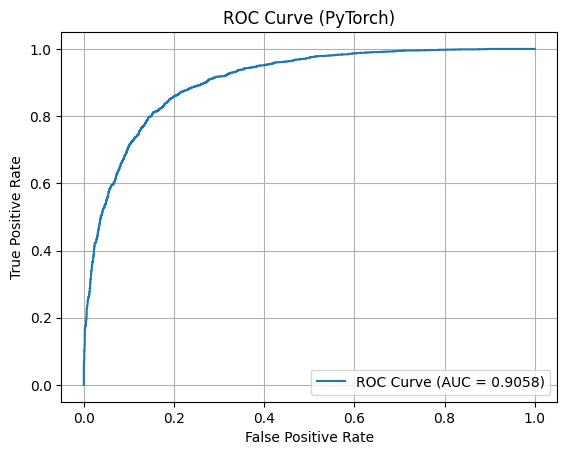

In [38]:
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(all_labels, all_preds):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (PyTorch)")
plt.grid()
plt.show()


Plot Loss

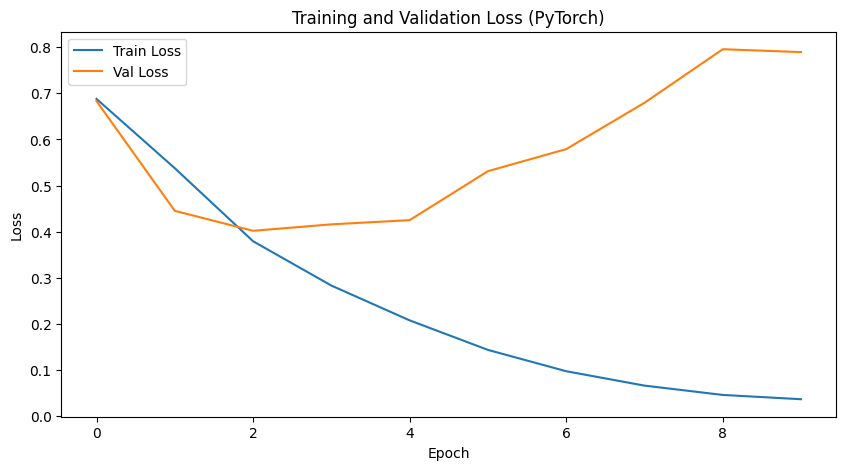

In [39]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (PyTorch)')
plt.legend()
plt.show()
